## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID",how="outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.


In [39]:
# Checking the number of mice.
micecount=merge_df["Mouse ID"].unique()
micecount=len(micecount)
print(f"There are {micecount} mice in the dataset" )

There are 249 mice in the dataset


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [40]:
# Creating a DataFrame object to check duplicated mouse ID
duplicates_id = pd.DataFrame(merge_df, 
                  columns = ['Mouse ID','Timepoint'])
  
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_id=duplicates_id[merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
    
# Print the resultant Dataframe
duplicates_id

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
only_duplicates_id=merge_df.loc[merge_df["Mouse ID"]=="g989"]
print (only_duplicates_id)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.loc[merge_df["Mouse ID"]!="g989"]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [43]:
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [44]:
# Checking the number of mice in the clean DataFrame.
micecount_clean=clean_df["Mouse ID"].unique()
micecount_clean=len(micecount_clean)
print(f"There are {micecount_clean} mice left in the dataset" )

There are 248 mice left in the dataset


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [45]:
#groupby using "Drug Regimen"and "Timepoint", calculate stats on "Tumor Volume"
grouped_clean_df=clean_df.groupby(['Drug Regimen','Timepoint'])
grouped_Tumor_mean=grouped_clean_df['Tumor Volume (mm3)'].mean()
grouped_Tumor_median=grouped_clean_df['Tumor Volume (mm3)'].median()
grouped_Tumor_var=grouped_clean_df['Tumor Volume (mm3)'].var()
grouped_Tumor_std=grouped_clean_df['Tumor Volume (mm3)'].std()
grouped_Tumor_sem=grouped_clean_df['Tumor Volume (mm3)'].sem()

In [46]:
# Generate a summary statistics table
summary_stats= pd.DataFrame({"mean": grouped_Tumor_mean,"median": grouped_Tumor_median,"variance":grouped_Tumor_var, "standard deviation":grouped_Tumor_std,"SEM":grouped_Tumor_sem})
summary_stats

mean     median   variance  standard deviation  \
Drug Regimen Timepoint                                                        
Capomulin    0          45.000000  45.000000   0.000000            0.000000   
             5          44.266086  45.597064   5.030889            2.242964   
             10         43.084291  43.421014  12.344133            3.513422   
             15         42.064317  42.798160  16.878693            4.108369   
             20         40.716325  40.716428  19.035028            4.362915   
...                           ...        ...        ...                 ...   
Zoniferol    25         55.432935  55.676604   5.808348            2.410052   
             30         57.713531  57.419744   9.601024            3.098552   
             35         60.089372  60.365832  10.876760            3.297993   
             40         62.916692  62.274543  13.958456            3.736102   
             45         65.960888  65.684689  14.100301            3.755037   

                             SEM  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

grouped_clean_df=clean_df.groupby(['Drug Regimen','Timepoint'])
grouped_clean_df.aggregate({"Tumor Volume (mm3)":['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                  \
                                     mean     median        var       std   
Drug Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000   
             5                  44.266086  45.597064   5.030889  2.242964   
             10                 43.084291  43.421014  12.344133  3.513422   
             15                 42.064317  42.798160  16.878693  4.108369   
             20                 40.716325  40.716428  19.035028  4.362915   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  2.410052   
             30                 57.713531  57.419744   9.601024  3.098552   
             35                 60.089372  60.365832  10.876760  3.297993   
             40                 62.916692  62.274543  13.958456  3.736102   
             45                 65.960888  65.684689  14.100301  3.755037   

                                  
                             sem  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [87]:
grouped_Regimen=clean_df.groupby(['Drug Regimen'])
grouped_Regimen_count=grouped_Regimen['Timepoint'].count()
grouped_Regimen_chart=pd.DataFrame({"Timepoint count": grouped_Regimen_count})
grouped_Regimen_chart

,Timepoint count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


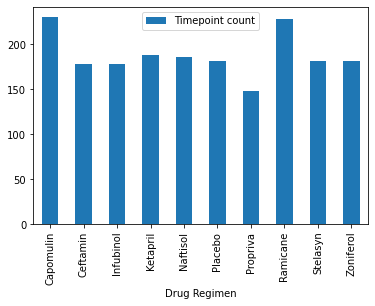

In [90]:
Regimen_df_plot=grouped_Regimen_chart.plot.bar()

Text(0.5, 0, 'Drug Regimen')

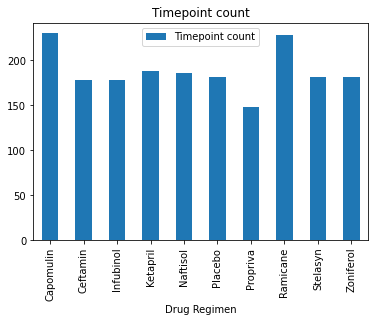

In [92]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Regimen_py_plot=grouped_Regimen_chart.plot(kind="bar",title="Timepoint count")
Regimen_py_plot.set_xlabel("Drug Regimen")


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [115]:
# count percentage
gender_df=clean_df[["Mouse ID","Sex"]]
gender_df=gender_df.drop_duplicates("Mouse ID",keep='first')
gender_count= pd.DataFrame({"Gender distribution": Gender_df["Sex"].value_counts(normalize=True)})

gender_count


,Gender distribution
Male,0.504032
Female,0.495968


In [117]:
gender_count.index

Index(['Male', 'Female'], dtype='object')

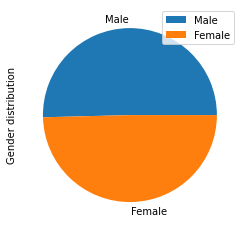

In [116]:
gender_df_plot=gender_count.plot.pie(y="Gender distribution")

AttributeError: 'tuple' object has no attribute 'set_ylabel'

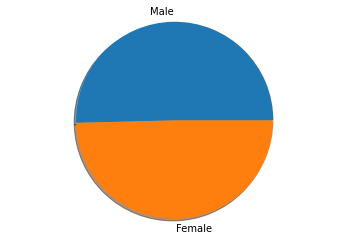

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1, ax1 = plt.subplots()
gender_py_plot=ax1.pie(gender_count["Gender distribution"],labels=gender_count.index, shadow=True, startangle=0)
ax1.axis('equal')

gender_py_plot.set_ylabel("Gender distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [129]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [130]:
# Start by getting the last (greatest) timepoint for each mouse
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [147]:
# try to pull out a dataframe that only assiciated with four drug regimens
4regimens =mouse_metadata.loc[(mouse_metadata["Drug Regimen"]=="Capomulin")|mouse_metadata["Drug Regimen"]=="Ramicane")|(mouse_metadata["Drug Regimen"]=="Infubinol")|mouse_metadata["Drug Regimen"]=="Ceftamin"),:]
4regimens.head()

SyntaxError: invalid syntax (<ipython-input-147-0449f499acf2>, line 2)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
